In [ ]:
import pickle
import time
import numpy as np
from matplotlib import pyplot as plt

#### Loading spikes, reduce it to 1 Hz and save the reduced dictionary

In [ ]:
npys_dir = '/home/maspe/filer/SERT/ALL/npys/'
IDs_WT = ['SERT1597', 'SERT1659'] #, 'SERT1678', 'SERT1908', 'SERT1984', 'SERT1985', 'SERT2014']
IDs_KO = ['SERT1668', 'SERT1665'] #, 'SERT2018', 'SERT2024', 'SERT2013'] 

In [ ]:
sample_rate = 30000

### For WTs
print('Processing WTs...')
reduced_spikes_WT = {}
for ID in IDs_WT:
    print('Importing {}...'.format(ID))
    clock = time.time()
    
    # Get the raw data, sampled at 30 kHz
    data = np.load(npys_dir + ID + '_spikes_WT.npy', allow_pickle=True)
    
    # Reduce it to a sample rate of 1 Hz
    reduced_spikes_WT[ID] = np.add.reduceat(data, range(0, data.shape[1], sample_rate), axis=1)
        
    print('{} imported in {} min.'.format(ID, (time.time() - clock) / 60))

    
print('Saving the data for WTs...')
with open(npys_dir + 'reduced_WT.spikes', 'wb') as f:
    pickle.dump(reduced_spikes_WT, f, protocol=2)
print('Done!')


### For KOs
print('Processing KOs...')
reduced_spikes_KO = {}
for ID in IDs_KO:
    print('Importing {}...'.format(ID))
    clock = time.time()
    
    # Get the raw data, sampled at 30 kHz
    data = np.load(npys_dir + ID + '_spikes_KO.npy', allow_pickle=True)
    
    # Reduce it to a sample rate of 1 Hz
    reduced_spikes_KO[ID] = np.add.reduceat(data, range(0, data.shape[1], sample_rate), axis=1)
        
    print('{} imported in {} min.'.format(ID, (time.time() - clock) / 60))

    
print('Saving the data for KOs...')
with open(npys_dir + 'reduced_KO.spikes', 'wb') as f:
    pickle.dump(reduced_spikes_KO, f, protocol=2)
print('Done!')

####################

### Loading previously created dictionaries

#### Load the dictionary with the spikes reduced at 1 Hz 

In [1]:
import pickle
import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
npys_dir = '/home/maspe/filer/SERT/ALL/npys/'

### For WTs:
with open(npys_dir + 'reduced_WT.spikes', 'rb') as f:
    reduced_spikes_WT = pickle.load(f) #, encoding='latin1')
    
with open('/home/maspe/filer/SERT/ALL/npys/channels_by_spikes_WT.info', 'rb') as f:
    all_channels_WT = pickle.load(f)
    

### For KOs:
with open(npys_dir + 'reduced_KO.spikes', 'rb') as f:
    reduced_spikes_KO = pickle.load(f) #, encoding='latin1')
    
with open('/home/maspe/filer/SERT/ALL/npys/channels_by_spikes_KO.info', 'rb') as f:
    all_channels_KO = pickle.load(f)

#### Normalise the spikes, separately for baseline (2 min of HC, previous to OF) and OF (10 min task)

In [3]:
### Extract a windows of n_secs length at the beginning and end of the task
n_min = 2
sample_rate = 1
start_OF = n_min * 60 * sample_rate # After first 2 minutes at 1 Hz

### For WTs
normalised_spikes_WT = {}
for mouse in reduced_spikes_WT.keys():
    mice_matrix = reduced_spikes_WT[mouse]
    
    #n_units = mice_matrix.shape[0]
    
    # Create baseline normalised by the mean
    # Solution from: https://stackoverflow.com/questions/26333005/numpy-subtract-every-row-of-matrix-by-vector/26333184
    baseline = (mice_matrix[:, :start_OF].T - np.mean(mice_matrix[:, :start_OF], axis=1)).T
    OF = (mice_matrix[:, start_OF:].T - np.mean(mice_matrix[:, start_OF:], axis=1)).T 
    
    normalised_spikes_WT[mouse] = np.concatenate([baseline, OF], axis=1)


### For WTs
normalised_spikes_KO = {}
for mouse in reduced_spikes_KO.keys():
    mice_matrix = reduced_spikes_KO[mouse]
    
    #n_units = mice_matrix.shape[0]
    
    # Create baseline normalised by the mean
    # Solution from: https://stackoverflow.com/questions/26333005/numpy-subtract-every-row-of-matrix-by-vector/26333184
    baseline = (mice_matrix[:, :start_OF].T - np.mean(mice_matrix[:, :start_OF], axis=1)).T
    OF = (mice_matrix[:, start_OF:].T - np.mean(mice_matrix[:, start_OF:], axis=1)).T 
    
    normalised_spikes_KO[mouse] = np.concatenate([baseline, OF], axis=1)


In [12]:
### ALL CHANNELS COULD BE JUST ONE DICT FOR WTs AND KOs!!!!!!!
### NORMALISED_SPIKES ALSO!!!!!!!
### For WTs
iteration = 0
for mouse in normalised_spikes_WT.keys():
    mPFC_indexes = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'mPFC_left']
    NAC_indexes  = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'NAC_left']
    BLA_indexes  = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'BLA_left']
    vHip_indexes = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'vHipp_left']
    
    if iteration == 0:
        mPFC_WT = np.mean(normalised_spikes_WT[mouse][mPFC_indexes, :], axis=0)
        NAC_WT  = np.mean(normalised_spikes_WT[mouse][NAC_indexes, :],  axis=0)
        BLA_WT  = np.mean(normalised_spikes_WT[mouse][BLA_indexes, :],  axis=0)
        vHip_WT = np.mean(normalised_spikes_WT[mouse][vHip_indexes, :], axis=0)
        
    else:
        mPFC_WT = np.vstack((mPFC_WT, np.mean(normalised_spikes_WT[mouse][mPFC_indexes, :], axis=0)))
        NAC_WT  = np.vstack((NAC_WT,  np.mean(normalised_spikes_WT[mouse][NAC_indexes, :],  axis=0)))
        BLA_WT  = np.vstack((BLA_WT,  np.mean(normalised_spikes_WT[mouse][BLA_indexes, :],  axis=0)))
        vHip_WT = np.vstack((vHip_WT, np.mean(normalised_spikes_WT[mouse][vHip_indexes, :], axis=0)))
        
    iteration =+ 1
    

### For KOs
iteration = 0
for mouse in normalised_spikes_KO.keys():
    mPFC_indexes = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'mPFC_left']
    NAC_indexes  = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'NAC_left']
    BLA_indexes  = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'BLA_left']
    vHip_indexes = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'vHipp_left']
    
    if iteration == 0:
        mPFC_KO = np.mean(normalised_spikes_KO[mouse][mPFC_indexes, :], axis=0)
        NAC_KO  = np.mean(normalised_spikes_KO[mouse][NAC_indexes, :],  axis=0)
        BLA_KO  = np.mean(normalised_spikes_KO[mouse][BLA_indexes, :],  axis=0)
        vHip_KO = np.mean(normalised_spikes_KO[mouse][vHip_indexes, :], axis=0)
        
    else:
        mPFC_KO = np.vstack((mPFC_KO, np.mean(normalised_spikes_KO[mouse][mPFC_indexes, :], axis=0)))
        NAC_KO  = np.vstack((NAC_KO,  np.mean(normalised_spikes_KO[mouse][NAC_indexes, :],  axis=0)))
        BLA_KO  = np.vstack((BLA_KO,  np.mean(normalised_spikes_KO[mouse][BLA_indexes, :],  axis=0)))
        vHip_KO = np.vstack((vHip_KO, np.mean(normalised_spikes_KO[mouse][vHip_indexes, :], axis=0)))
        
    iteration =+ 1


In [ ]:
#npys_dir = '/home/maspe/filer/SERT/ALL/npys/'

#all_spikes_WT = {'mPFC': mPFC_WT, 'BLA': BLA_WT, 'NAC': NAC_WT, 'vHip': vHip_WT}
#np.save('/home/maspe/filer/SERT/ALL/npys/all_spikes_WT', all_spikes_WT)

In [20]:
WT_grandAverage = {'mPFC': {'mean': np.mean(mPFC_WT, axis=0),
                            'sem': np.std(mPFC_WT, axis=0) / np.sqrt(mPFC_WT.shape[0])},
                  'NAC':  {'mean': np.mean(NAC_WT, axis=0),
                            'sem': np.std(NAC_WT, axis=0) / np.sqrt(NAC_WT.shape[0])},
                  'BLA':  {'mean': np.mean(BLA_WT, axis=0),
                            'sem': np.std(BLA_WT, axis=0) / np.sqrt(BLA_WT.shape[0])},
                  'vHip': {'mean': np.mean(vHip_WT, axis=0),
                            'sem': np.std(vHip_WT, axis=0) / np.sqrt(vHip_WT.shape[0])}}

KO_grandAverage = {'mPFC': {'mean': np.mean(mPFC_KO, axis=0),
                            'sem': np.std(mPFC_KO, axis=0) / np.sqrt(mPFC_KO.shape[0])},
                  'NAC':  {'mean': np.mean(NAC_KO, axis=0),
                            'sem': np.std(NAC_KO, axis=0) / np.sqrt(NAC_KO.shape[0])},
                  'BLA':  {'mean': np.mean(BLA_KO, axis=0),
                            'sem': np.std(BLA_KO, axis=0) / np.sqrt(BLA_KO.shape[0])},
                  'vHip': {'mean': np.mean(vHip_KO, axis=0),
                            'sem': np.std(vHip_KO, axis=0) / np.sqrt(vHip_KO.shape[0])}}

In [28]:
mPFC_KO.shape[1]

705

#### What to plot

In [56]:
structure = 'vHip'

tmean_WT = WT_grandAverage[structure]['mean']
tsem_WT  = WT_grandAverage[structure]['sem']
tmean_KO = KO_grandAverage[structure]['mean']
tsem_KO  = KO_grandAverage[structure]['sem']

total_time = tmean_KO.shape[0]
tx = range(0, total_time)

#### Plotting

Text(0.5,1,'vHip')

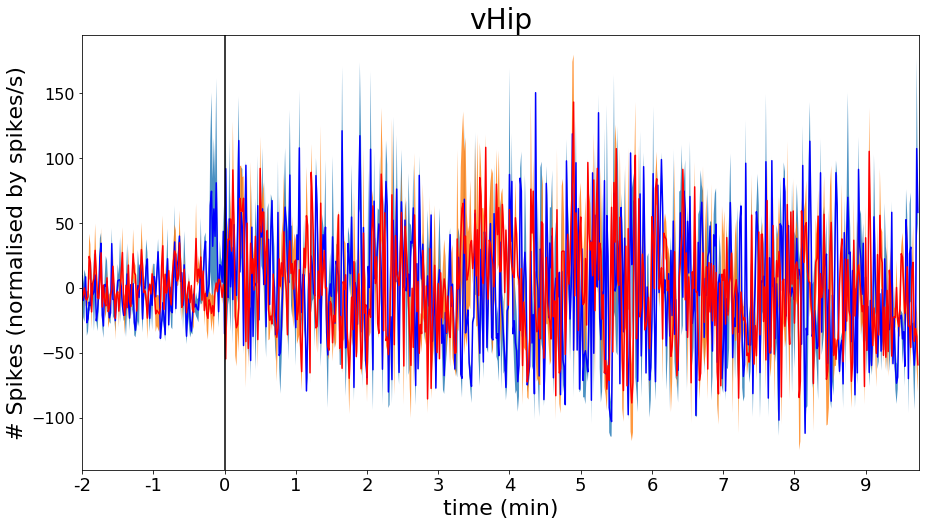

In [57]:
plt.figure(figsize=(15,8))

plt.plot(tx, tmean_WT, '-', color='blue', alpha=1)
plt.fill_between(tx, tmean_WT + tsem_WT, tmean_WT - tsem_WT, alpha=0.8)

plt.plot(tx, tmean_KO, '-', color='red', alpha=1)
plt.fill_between(tx, tmean_KO + tsem_KO, tmean_KO - tsem_KO, alpha=0.8)

plt.xticks(np.arange(0, total_time, 60),
           ['-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize=18)
plt.yticks(fontsize=16)
plt.xlim([0,total_time])
#plt.ylim([0,70])
plt.axvline(x=start_OF, color='black')
#plt.xlabel('time (s)')
plt.xlabel('time (min)', fontsize=22)
plt.ylabel('# Spikes (normalised by spikes/s)', fontsize=22)
plt.title(structure, fontsize=28)



In [42]:
np.arange(0,715,60)

array([  0,  60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660])

In [ ]:

ax.plot(tx[:start_OF], tmean_KO[:start_OF], '-', color='red', alpha=1)
ax.fill_between(tx[:start_OF], tmean_KO[:start_OF] + tsem_KO[:start_OF],
                tmean_KO[:start_OF] - tsem_KO[:start_OF], alpha=0.2)

ax2.plot(tx[start_OF:], tmean_WT[start_OF:], '-', color='blue', alpha=1)
ax2.fill_between(tx[start_OF:], tmean_WT[start_OF:] + tsem_WT[start_OF:],
                 tmean_WT[start_OF:] - tsem_WT[start_OF:], alpha=0.2)

ax2.plot(tx[start_OF:], tmean_KO[start_OF:], '-', color='red', alpha=1)
ax2.fill_between(tx[start_OF:], tmean_KO[start_OF:] + tsem_KO[start_OF:],
                 tmean_KO[start_OF:] - tsem_KO[start_OF:], alpha=0.2)

ax.set_xlim(0, start_OF)  # outliers only
ax2.set_xlim(start_OF, total_time)  # most of the data

#ax.set_ylim(0, 2500)  # outliers only


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = .02 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

#ax.set_xticklabels(['', '1', '2'], fontsize=14)
#ax2.set_xticklabels(['7', '8', '9', '10'])

ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)


#plt.text(380, 2200, structure, fontsize=18)

#plt.savefig('/home/maspe/filer/SERT/ALL/figs/' + structure + '_perispikes.pdf', dpi=150, facecolor='w', edgecolor='w',
#            orientation='portrait', papertype=None, format='pdf', transparent=False)


In [ ]:




# NAC
iteration = 0
t = np.zeros((len(NAC_WT.keys()), window*2 / 60))
for mouse in NAC_WT.keys():
    t[iteration,:]=np.add.reduceat(NAC_WT[mouse], range(0, NAC_WT[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_WT=np.mean(t, axis=0)

iteration = 0
t = np.zeros((len(NAC_KO.keys()), window*2 / 60))
for mouse in NAC_KO.keys():
    t[iteration,:]=np.add.reduceat(NAC_KO[mouse], range(0, NAC_KO[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_KO=np.mean(t, axis=0)

plt.subplot(2,2,2)
plt.plot(tx, tmean_WT, '-', color='blue', alpha=0.7)
plt.plot(tx, tmean_KO, '-', color='red', alpha=0.7)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['-3', '-2', '-1', '0', '1', '2', '3'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,70])
plt.axvline(x=60000, color='black')
#plt.xlabel('time (s)')
#plt.ylabel('units')
plt.title('NAC', fontsize=22)


# BLA
iteration = 0
t = np.zeros((len(BLA_WT.keys()), window*2 / 60))
for mouse in BLA_WT.keys():
    t[iteration,:]=np.add.reduceat(BLA_WT[mouse], range(0, BLA_WT[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_WT=np.mean(t, axis=0)

iteration = 0
t = np.zeros((len(BLA_KO.keys()), window*2 / 60))
for mouse in BLA_KO.keys():
    t[iteration,:]=np.add.reduceat(BLA_KO[mouse], range(0, BLA_KO[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_KO=np.mean(t, axis=0)

plt.subplot(2,2,3)
plt.plot(tx, tmean_WT, '-', color='blue', alpha=0.7)
plt.plot(tx, tmean_KO, '-', color='red', alpha=0.7)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['-3', '-2', '-1', '0', '1', '2', '3'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,70])
plt.axvline(x=60000, color='black')
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('units', fontsize=18)
plt.title('BLA', fontsize=24)


# vHip
iteration = 0
t = np.zeros((len(vHip_WT.keys()), window*2 / 60))
for mouse in vHip_WT.keys():
    t[iteration,:]=np.add.reduceat(vHip_WT[mouse], range(0, vHip_WT[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_WT=np.mean(t, axis=0)

iteration = 0
t = np.zeros((len(vHip_KO.keys()), window*2 / 60))
for mouse in vHip_KO.keys():
    t[iteration,:]=np.add.reduceat(vHip_KO[mouse], range(0, vHip_KO[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_KO=np.mean(t, axis=0)

plt.subplot(2,2,4)
plt.plot(tx, tmean_WT, '-', color='blue', alpha=0.7)
plt.plot(tx, tmean_KO, '-', color='red', alpha=0.7)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['-3', '-2', '-1', '0', '1', '2', '3'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,70])
plt.axvline(x=60000, color='black')
plt.xlabel('time (s)', fontsize=18)
#plt.ylabel('units')
plt.title('vHip', fontsize=24)


plt.savefig('/home/maspe/filer/SERT/ALL/figs/perispikes.png', dpi=150, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png', transparent=False)
    
#plt.close()

#####################################

#### Backup code

In [ ]:
spikes = []
for unit in range(len(spikes_epochs_pre)):
    # np.isin(element, test_elements)
    spikes.append(np.isin(epoch_matrix, [spikes_epochs_pre[unit] + spikes_epochs_post[unit]]))

In [ ]:
spikes_epochs_pre = []
spikes_epochs_post = []
for unit in range(len(all_units)):
    spiketimes_pre = []
    spiketimes_post = []
    for epoch in range(n_epochs):
        spiketimes_pre.extend(all_units[unit][(all_units[unit] > epochs_pre[epoch][0]) & (all_units[unit] < epochs_post[epoch][1])])
        spiketimes_post.extend(all_units[unit][(all_units[unit] > epochs_post[epoch][0]) & (all_units[unit] < epochs_post[epoch][1])])
    spikes_epochs_pre.append(spiketimes_pre)
    spikes_epochs_post.append(spiketimes_post)

In [ ]:
len(spikes_epochs_pre[52])

In [ ]:
spikes = []
for unit in range(len(spikes_epochs_pre)):
    # np.isin(element, test_elements)
    spikes.append(np.isin(epoch_matrix, [spikes_epochs_pre[unit] + spikes_epochs_post[unit]]))

In [ ]:
np.sum(spikes[50], axis=0).shape

In [ ]:
### Collect the name of channels, by mouse
#all_units_WT = {}
all_channels_WT = {}

n_channels = 32
for mouse in all_mice_WT.keys():

    units = []
    channels_id = []
    
    iteration = 0
    for channel in range(n_channels):
        for unit in all_mice_WT[mouse][channel]['spiketimes'].keys():
            #units.append(all_mice_WT[mouse][channel]['spiketimes'][unit][()]) # Final "[()]" is to import values from h5py 
      
            channels_id.append(all_info_WT[mouse]['channels_locs'][iteration])
        
        iteration += 1
        
            
    #all_units_WT[mouse] = units
    all_channels_WT[mouse] = channels_id
        
# print('n units = %i' %len(all_units))

### Same for KOs
#all_units_KO = {}
all_channels_KO = {}
for mouse in all_mice_KO.keys():
    n_channels = 32
    units = []
    channels_id = []
    
    iteration = 0
    for channel in range(n_channels):
        for unit in all_mice_KO[mouse][channel]['spiketimes'].keys():
            #units.append(all_mice_KO[mouse][channel]['spiketimes'][unit][()]) # Final "[()]" is to import values from h5py 
      
            channels_id.append(all_info_KO[mouse]['channels_locs'][iteration])
        
        iteration += 1
        
            
    #all_units_KO[mouse] = units
    all_channels_KO[mouse] = channels_id
        
# print('n units = %i' %len(all_units))

